## Telecomm customization of offers to Customers

Given the dataset with predefined labels, it is requested to build a KNN model to predict the  class of a new or unknown case, so the company can plan on customized offers.

Dataset: https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv

- The dataset provides informations about customers and the services they hired.

- Target: 'custcat' [1 - Basic service, 2- E-Service 3- Plus Service 4- Total Service] 
- Test for K = 1~12


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import jaccard_score
%matplotlib inline

In [2]:

df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')
print(df.shape)
df.head()

(1000, 12)


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [22]:
df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


In [6]:
# classifications count, checking for NaN
df['custcat'].value_counts(dropna=False)

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [13]:
# Features - df to array, checking 5 first
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']].values
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [14]:
# Target - df to array, checking 5 first
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

In [15]:
# Normalizing features for KNN algorithm
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [21]:
# Data split - 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

print('Train set:', X_train.shape,  y_train.shape)
print('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


[0.17647059 0.16959064 0.18694362 0.19047619 0.18694362 0.18343195
 0.2012012  0.19402985 0.20481928 0.19760479 0.18694362 0.20481928]

max acc[Jaccard]:  0.20481927710843373 for K= 9


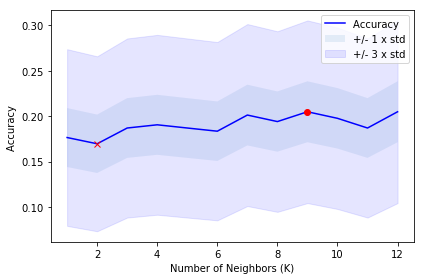

In [48]:
# Classification - KNN
K = 12 # Number os K's to be tested

Ks = K+1
mean_acc = np.zeros((Ks-1)) 
std_acc = np.zeros((Ks-1))

# Getting best K out of Ks
for k in range(1,Ks): 
    
    #Training  
    knn_model = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    
    #Test and Evaluation
    knn_pred = knn_model.predict(X_test)
    mean_acc[k-1] = jaccard_score(y_test, knn_pred, average='micro') # average= micro had better results than average = macro or weighted

    
    std_acc[k-1]=np.std(knn_pred==y_test)/np.sqrt(knn_pred.shape[0])

#Accuracies after test:
print(mean_acc)

#Best K and accuracy
print("\nmax acc[Jaccard]: ", mean_acc.max(), "for K=",mean_acc.argmax()+1)

plt.plot(range(1,Ks),mean_acc,'b')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10) # área +/- 1*std
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="blue") # área +/- 3*std
plt.legend(('Accuracy ', '+/- 1 x std','+/- 3 x std'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')

n_max = mean_acc.argmax()
plt.plot(range(1,Ks)[n_max],mean_acc[n_max],'o',color = 'r') # Max acc
n_min = mean_acc.argmin()
plt.plot(range(1,Ks)[n_min],mean_acc[n_min],'x', color='r') # Min acc
plt.tight_layout()
plt.show()


In [47]:
print( "The best accuracy of knn_model for k=1~12 was ", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy of knn_model for k=1~12 was with 0.20481927710843373 with k= 9
